In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [86]:
df = pd.read_csv('timesData.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [88]:
df.head(15)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [89]:
# Функция, которая будет строить графики распределения для данной выборки
def distribution_comparison(sample: pd.DataFrame) -> plt.axes:
    """Returns 3 pairs of distribution histograms comparing given DataFrame with original one by rows
    'teaching', 'research', 'citations'.

    Args:
        sample (pd.DataFrame): The other DataFrame to be compared with the original one."""
    plt.figure(figsize = (10,10))

    plt.subplot(3,2,1)
    plt.title('General. Teaching')
    df['teaching'].hist()

    plt.subplot(3,2,2)
    plt.title('Sample. Teaching')
    sample['teaching'].hist()

    plt.subplot(3,2,3)
    plt.title('General. Research')
    df['research'].hist()

    plt.subplot(3,2,4)
    plt.title('Sample. Research')
    sample['research'].hist()

    plt.subplot(3,2,5)
    plt.title('General. Citations')
    df['citations'].hist()

    plt.subplot(3,2,6)
    plt.title('Sample. Citations')
    sample['citations'].hist()

    plt.show()

In [90]:
# Функция, которая будет возвращать таблицу со сравнением средних и медианных показателей
def mean_median_table_comparison(sample: pd.DataFrame) -> pd.DataFrame:
    """Returns a DataFrame object comparing the average and median values of
    given DataFrame with original one by rows 'teaching', 'research', 'citations'.

    Args:
        sample (pd.DataFrame): The other DataFrame to be compared with the original one."""
    data = df[['teaching', 'research', 'citations']].agg(['mean', 'median'])
    data1 = sample[['teaching', 'research', 'citations']].agg(['mean', 'median'])

    data = data.T
    data1 = data1.T

    print(f"""Ключевые показатели выборки:
    {data}

    Ключевые показатели генеральной совокупности:
    {data1}""")

In [91]:
# Функция, которая будет возвращать гистограмы, сравнивающие средние и медианные значения
def mean_median_graph_comparison(sample_df: pd.DataFrame) -> plt.axes:
    """Returns plt.axes objects comparing the average and median values of
    given DataFrame with original one by rows 'teaching', 'research', 'citations'.

    Args:
        sample (pd.DataFrame): The other DataFrame to be compared with the original one."""

    data = df[['teaching', 'research', 'citations']].agg(['mean', 'median'])
    data1 = sample_df[['teaching', 'research', 'citations']].agg(['mean', 'median'])

    data = data.T
    data1 = data1.T

    cat_par = ['teaching', 'research','citations']
    width = 0.2
    x = np.arange(len(cat_par))

    origin = data['mean']
    sample_data = data1['mean']

    fig, (ax1, ax2) = plt.subplots(1,2)

    rects1 = ax1.bar(x - width/2, origin, width, label='origin')
    rects2 = ax1.bar(x + width/2, sample_data, width, label='sample')
    ax1.set_title('Mean values')
    ax1.set_xticks(x)
    ax1.set_xticklabels(cat_par)
    ax1.legend()

    origin = data['median']
    sample_data = data1['median']

    rects1 = ax2.bar(x - width/2, origin, width, label='origin')
    rects2 = ax2.bar(x + width/2, sample_data, width, label='sample')
    ax2.set_title('Median values')
    ax2.set_xticks(x)
    ax2.set_xticklabels(cat_par)
    ax2.legend()


1. Выборка рандомом через df.sample()

In [92]:
# Здесь и далее будем исследовать 25% от генеральной совокупности
# Сравнивать выборку с ГС будем по следующим критериям: средняя, медиана, распределения по teaching, research, citations
size = np.floor(df['university_name'].count() * 0.25)
df1 = df.sample(int(size))

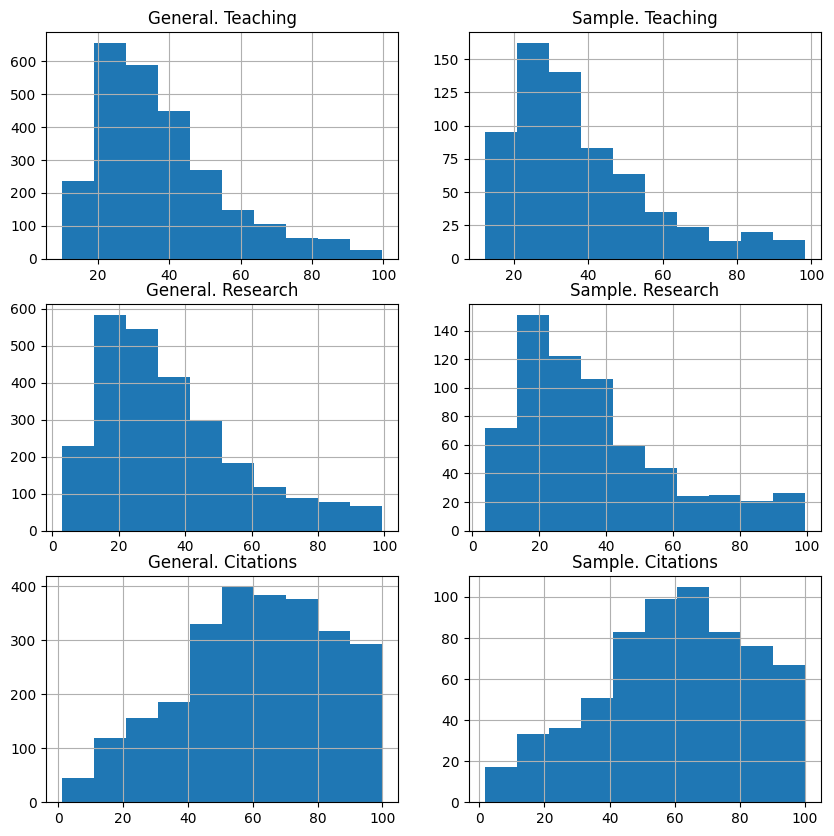

In [93]:
distribution_comparison(df1)

In [94]:
mean_median_table_comparison(df1)

Ключевые показатели выборки:
                    mean  median
teaching   37.801498    33.9
research   35.910257    30.5
citations  60.921629    62.5
          
    Ключевые показатели генеральной совокупности:
                    mean  median
teaching   38.375846   33.65
research   36.522462   30.65
citations  59.806615   61.75


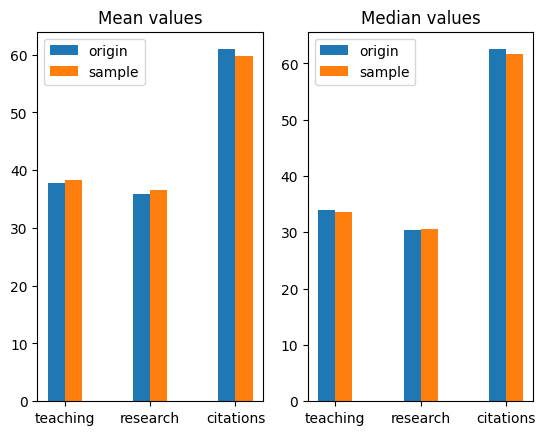

In [95]:
mean_median_graph_comparison(df1)

2. Механическая выборка по каждому четвёртому элементу

In [96]:
df2 = df[::4]

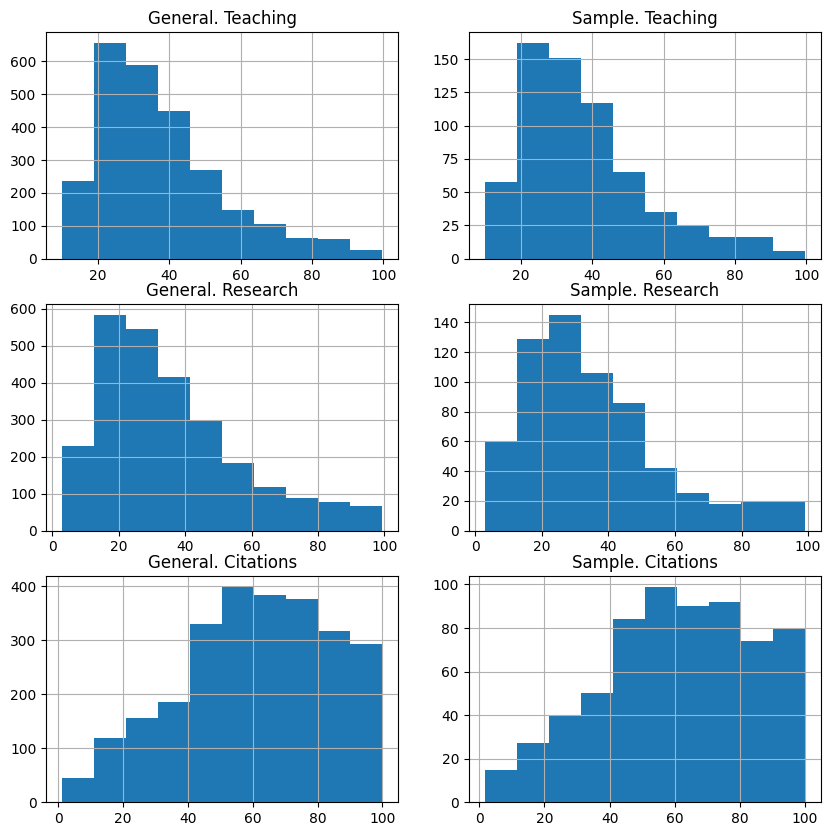

In [98]:
distribution_comparison(df2)

In [100]:
mean_median_table_comparison(df2)

Ключевые показатели выборки:
                    mean  median
teaching   37.801498    33.9
research   35.910257    30.5
citations  60.921629    62.5
          
    Ключевые показатели генеральной совокупности:
                    mean  median
teaching   37.685714    33.7
research   36.005376    31.3
citations  60.901075    62.1


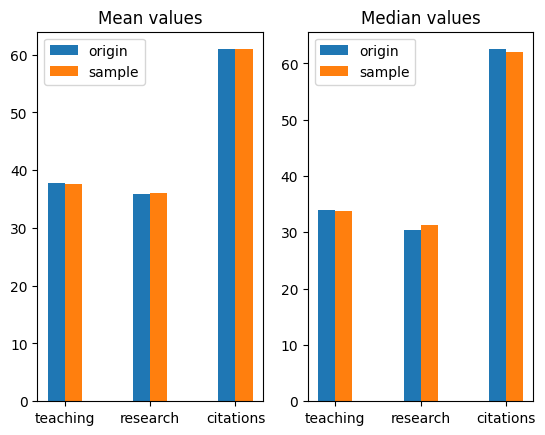

In [99]:
mean_median_graph_comparison(df2)

3. Выборка по 100 университетов из каждого года

In [137]:
df3 = df.iloc[0:0]   # Пустой датафрейм с колонками
years = df['year'].unique()

for y in years:
  temp = df[df.year == y]
  df3 = pd.concat([df3, temp.sample(100)], ignore_index=True)

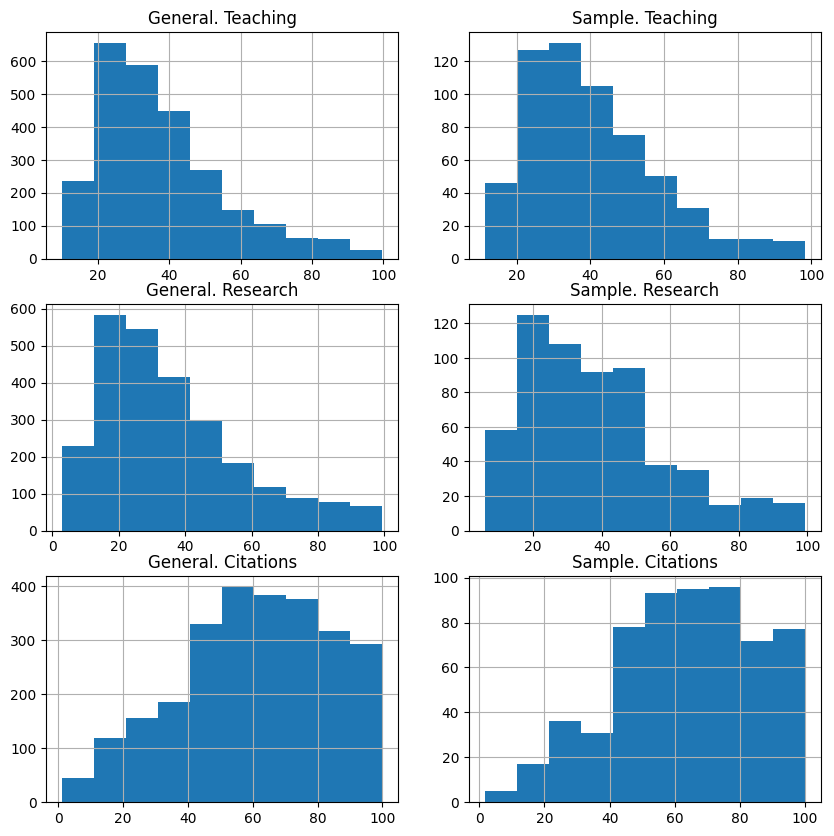

In [134]:
distribution_comparison(df3)

In [135]:
mean_median_table_comparison(df3)

Ключевые показатели выборки:
                    mean  median
teaching   37.801498    33.9
research   35.910257    30.5
citations  60.921629    62.5
          
    Ключевые показатели генеральной совокупности:
                    mean  median
teaching   40.369333   37.00
research   38.597667   34.75
citations  63.559167   64.50


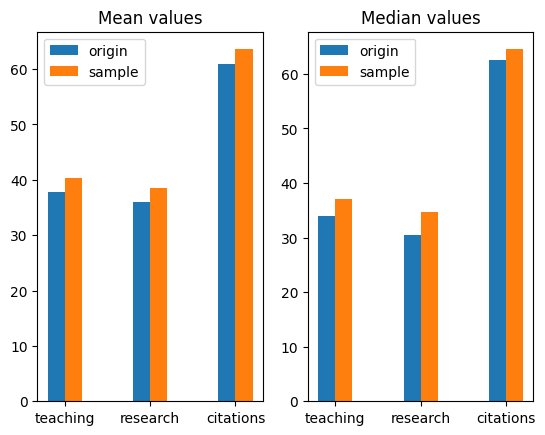

In [136]:
mean_median_graph_comparison(df3)

4. Выборка по 25% с каждой страны из топ-25 по количеству универов

In [254]:
df[df.country == 'Unisted States of America'] = 'United States of America'

num_countries = df[['country', 'world_rank']].groupby('country').count().sort_values('world_rank', ascending = False).head(25)

countries = num_countries.T.columns
df4 = df.iloc[0:0]

for c in countries:
  size = math.ceil(num_countries.loc[c] * 0.25)
  temp = df[df.country == c]
  df4 = pd.concat([df4, temp.sample(size)], ignore_index=True)

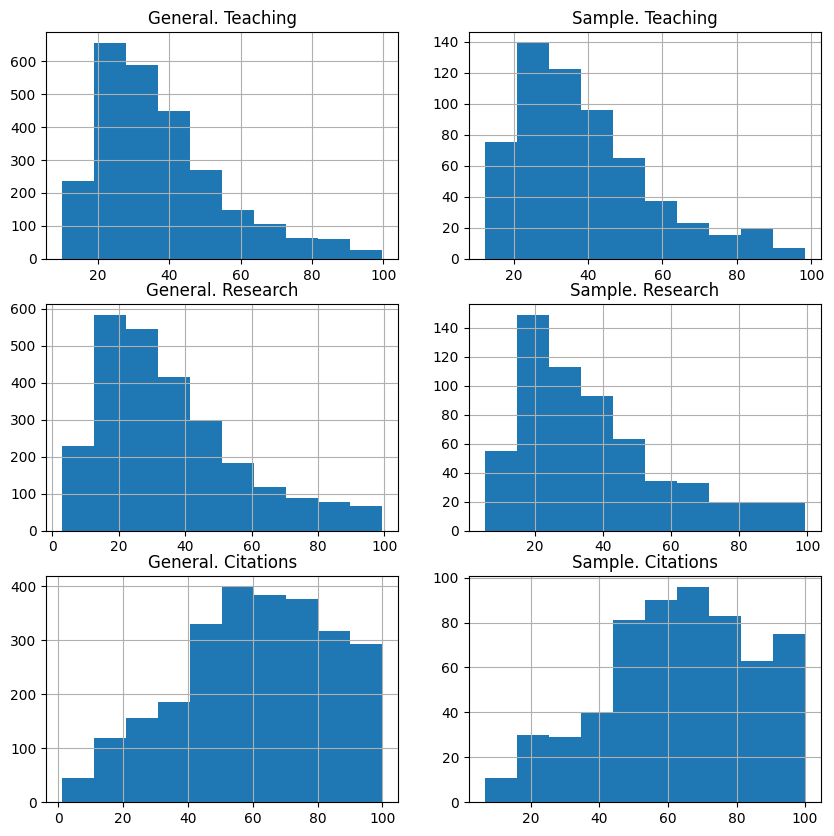

In [256]:
distribution_comparison(df4)

In [257]:
mean_median_table_comparison(df4)

Ключевые показатели выборки:
                    mean  median
teaching   37.801498    33.9
research   35.910257    30.5
citations  60.921629    62.5
          
    Ключевые показатели генеральной совокупности:
                    mean  median
teaching   39.296488   35.95
research   37.410201   32.15
citations  63.203177   64.10


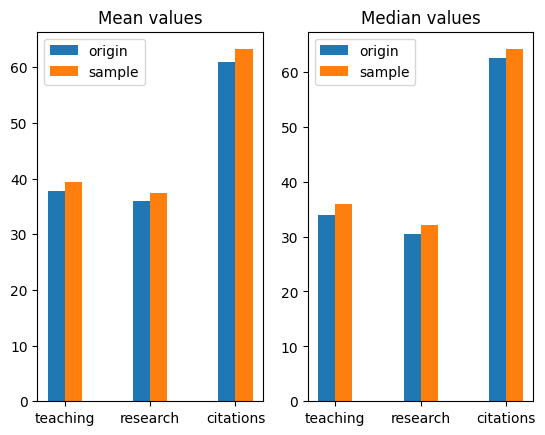

In [258]:
mean_median_graph_comparison(df4)

5. Выборка 25% из групп университетов по количесвту студентов

In [376]:
# Приведем числа к рабочему виду
a = df['num_students']
for i in range(df.shape[0]):
  try:
    a.iloc[i] = int(a.iloc[i].replace(',',''))
  except:
    pass

<Axes: ylabel='Density'>

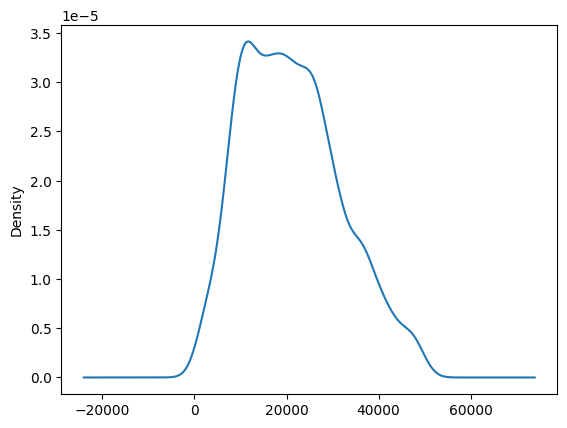

In [299]:
a[a<50000].plot.density()

In [374]:
# Делим на группы
dfc = df.copy()

for i in range(len(dfc)):
  try:
    if dfc.iloc[i]['num_students'] <= 11500:
      dfc.iat[i, 9] = 'very small'
    elif dfc.iloc[i]['num_students'] <= 17750:
      dfc.iat[i, 9] = 'small'
    elif dfc.iloc[i]['num_students'] <= 24000:
      dfc.iat[i, 9] = 'medium'
    elif dfc.iloc[i]['num_students'] <= 32000:
      dfc.iat[i, 9] = 'big'
    elif dfc.iloc[i]['num_students'] > 32000:
      dfc.iat[i, 9] = 'very big'
  except:
      pass

In [391]:
# И проверяем, чтобы они были равнонаполненными
gr_vol = dfc[['world_rank', 'num_students']].groupby('num_students').count()
gr_vol

,world_rank
num_students,
big,520
medium,499
small,500
very big,528
very small,497


In [409]:
# Создаём выборку
groups = gr_vol.T.columns
df5 = df.iloc[0:0]

for g in groups:
    size = math.ceil(gr_vol.loc[g] * 0.25)
    temp = dfc[dfc.num_students == g]
    df5 = pd.concat([df5, temp.sample(size)], ignore_index=True)

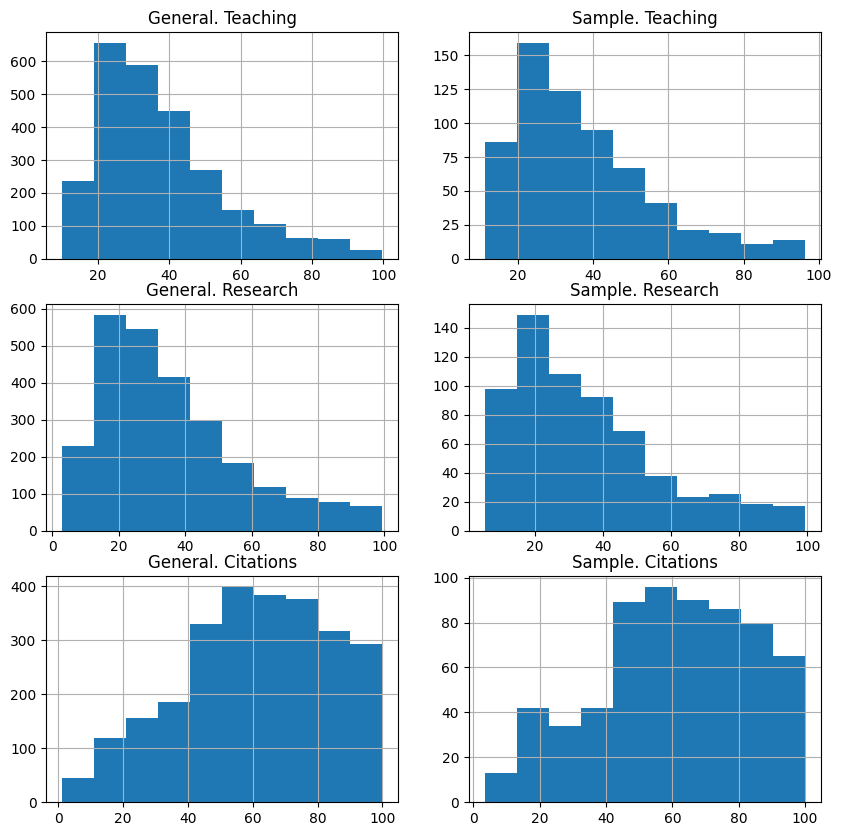

In [410]:
distribution_comparison(df5)

In [411]:
mean_median_table_comparison(df5)

Ключевые показатели выборки:
                    mean  median
teaching   37.801498    33.9
research   35.910257    30.5
citations  60.921629    62.5
          
    Ключевые показатели генеральной совокупности:
                    mean  median
teaching   37.427943    32.6
research   35.464050    29.8
citations  60.593721    61.5


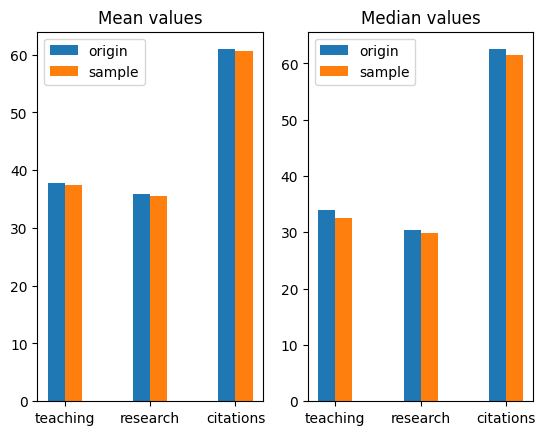

In [412]:
mean_median_graph_comparison(df5)

В целом, наиболее качественно себя показали 1 и 2 выборки, основанные на рандоме. В них можно пости идентичные распределения, а также средние и медианы очень близки к показателям генеральной совокупности.
А вот худшей была третья выборка по 100 универов по каждому году: графики не похожи, а средние и медианы в некотрых местах отлючаются на 15-20% процентов, что очень плохо.  